In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

1. (optional) Implement GMM algorithm by Numpy.

In [2]:
class GMM:
    def __init__(self, n_components: int, n_iters: int, tol: float, seed: int):
        self.n_components = n_components
        self.n_iters = n_iters
        self.tol = tol
        self.seed = seed

    def fit(self, X):

        # data's dimensionality and responsibility vector
        n_row, n_col = X.shape     
        self.resp = np.zeros((n_row, self.n_components))

        # initialize parameters
        np.random.seed(self.seed)
        chosen = np.random.choice(n_row, self.n_components, replace = False)
        self.means = X[chosen]
        self.weights = np.full(self.n_components, 1 / self.n_components)
        
        # for np.cov, rowvar = False, 
        # indicates that the rows represents obervation
        shape = self.n_components, n_col, n_col
        self.covs = np.full(shape, np.cov(X, rowvar = False))

        log_likelihood = 0
        self.converged = False
        self.log_likelihood_trace = []      

        for i in range(self.n_iters):
            log_likelihood_new = self._do_estep(X)
            self._do_mstep(X)

            if abs(log_likelihood_new - log_likelihood) <= self.tol:
                self.converged = True
                break
  
            log_likelihood = log_likelihood_new
            self.log_likelihood_trace.append(log_likelihood)

        return self

    def _do_estep(self, X):
        self._compute_log_likelihood(X)
        log_likelihood = np.sum(np.log(np.sum(self.resp, axis = 1)))

        # normalize over all possible cluster assignments
        self.resp = self.resp / self.resp.sum(axis = 1, keepdims = 1)
        return log_likelihood

    def _compute_log_likelihood(self, X):
        for k in range(self.n_components):
            prior = self.weights[k]
            likelihood = multivariate_normal(self.means[k], self.covs[k]).pdf(X)
            self.resp[:, k] = prior * likelihood

        return self

    def _do_mstep(self, X):
        # total responsibility assigned to each cluster, N^{soft}
        resp_weights = self.resp.sum(axis = 0)
        
        # weights
        self.weights = resp_weights / X.shape[0]

        # means
        weighted_sum = np.dot(self.resp.T, X)
        self.means = weighted_sum / resp_weights.reshape(-1, 1)
        # covariance
        for k in range(self.n_components):
            diff = (X - self.means[k]).T
            weighted_sum = np.dot(self.resp[:, k] * diff, diff.T)
            self.covs[k] = weighted_sum / resp_weights[k]
            
        return self

2. Create at least three toy dataset (https://scikit-learn.org/stable/datasets/sample_generators.html), then apply GMM algorithm built in the first question or used sklearn library? Try different number of cluster to see how the result change? Draw the elbow and Silhouette score for the above dataset.

In [6]:
from sklearn.datasets import make_blobs
# 1:
X, y = make_blobs(n_samples=10, centers=3, n_features=2,random_state=10)
print("Features:\n", X[:5])
print("Target:\n", y[:5])

Features:
 [[ 5.69192445 -9.47641249]
 [ 1.70789903  6.00435173]
 [ 0.23621041 -3.11909976]
 [ 2.90159483  5.42121526]
 [ 5.85943906 -8.38192364]]
Target:
 [0 1 2 1 0]


In [8]:
# 2:
X1, y1 = make_blobs(n_samples=10, centers=6, n_features=2,random_state=10)
print("Features:\n", X1[:5])
print("Target:\n", y1[:5])

Features:
 [[ 1.45467725 -6.58387198]
 [-1.16646197 -5.36893021]
 [ 3.80634558 10.4658633 ]
 [ 5.85943906 -8.38192364]
 [ 2.90159483  5.42121526]]
Target:
 [2 2 5 0 1]


In [9]:
# 3:
X2, y2 = make_blobs(n_samples=10, centers=9, n_features=2,random_state=10)
print("Features:\n", X2[:5])
print("Target:\n", y2[:5])

Features:
 [[-10.19228266   0.85704945]
 [ -2.00758803  -7.24743939]
 [ -5.49409202  -6.5605815 ]
 [  4.56781464  -4.63862065]
 [  5.98510204   1.70121232]]
Target:
 [6 2 4 8 7]


(-2.410354878297673, 6.450515682916975, -11.120516488645157, 6.819821643869231)

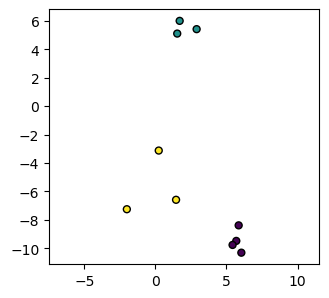

In [18]:
plt.figure(figsize=(3,3))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
plt.axis('equal')

(-8.710266487503123,
 6.553234557326214,
 -10.770832449624773,
 11.477134527212167)

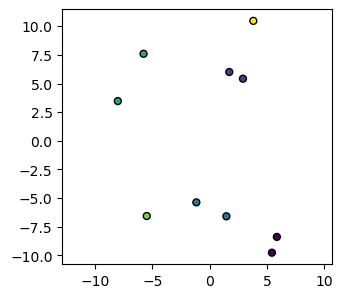

In [19]:
plt.figure(figsize=(3,3))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=y1, s=25, edgecolor="k")
plt.axis('equal')

(-11.001151896696301,
 6.793971279657512,
 -10.445608506131116,
 11.461647672760087)

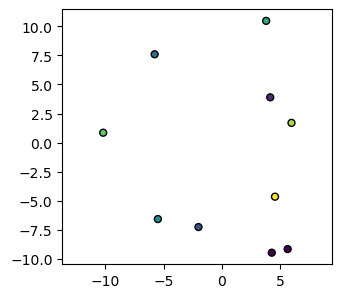

In [20]:
plt.figure(figsize=(3,3))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=y2, s=25, edgecolor="k")
plt.axis('equal')

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

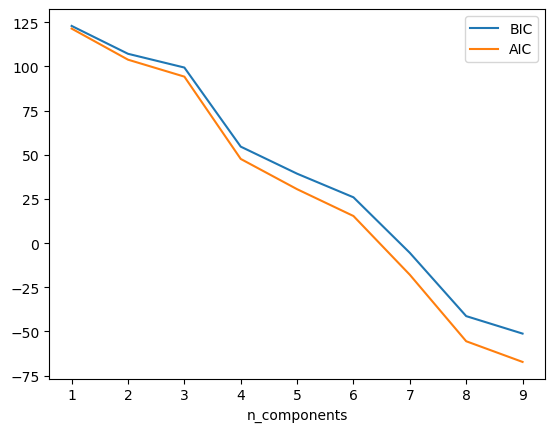

In [28]:
n_components = np.arange(1, 10)
clfs = [GaussianMixture(n, random_state=0).fit(X) for n in n_components]
bics = [clf.bic(X) for clf in clfs]
aics = [clf.aic(X) for clf in clfs]

plt.plot(n_components, bics, label = 'BIC')
plt.plot(n_components, aics, label = 'AIC')
plt.xlabel('n_components')
plt.legend()
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

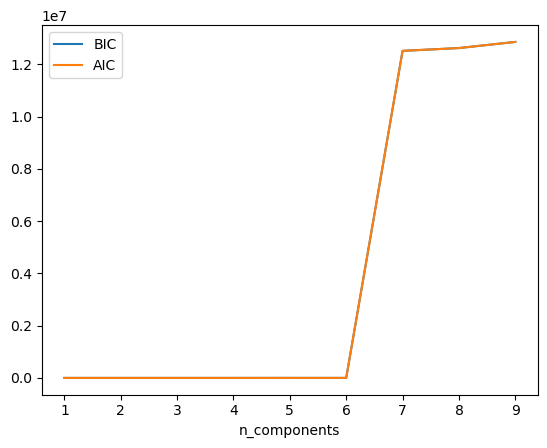

In [29]:
n_components = np.arange(1, 10)
clfs = [GaussianMixture(n, random_state=0).fit(X1) for n in n_components]
bics = [clf.bic(X) for clf in clfs]
aics = [clf.aic(X) for clf in clfs]

plt.plot(n_components, bics, label = 'BIC')
plt.plot(n_components, aics, label = 'AIC')
plt.xlabel('n_components')
plt.legend()
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

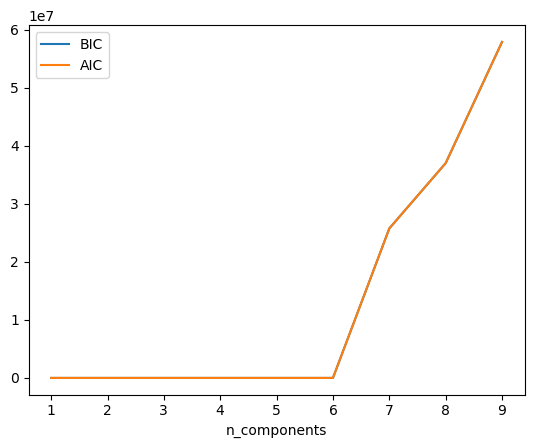

In [31]:
n_components = np.arange(1, 10)
clfs = [GaussianMixture(n, random_state=0).fit(X2) for n in n_components]
bics = [clf.bic(X) for clf in clfs]
aics = [clf.aic(X) for clf in clfs]

plt.plot(n_components, bics, label = 'BIC')
plt.plot(n_components, aics, label = 'AIC')
plt.xlabel('n_components')
plt.legend()
plt.show()

3. Compare kmeans and GMM (cons and pros)
- **K-MEANS**:
  + Groups data points using distance from the cluster centroid
  + Assume that all clusters are uniformly shaped spheres
  + Assigns each data point to 1 unique cluster
  + Use a determinister approach
 
- **GMM**
  + Uses a probabilistic assigment of data points to clusters
  + Accommodate clusters of varying shapes
  + give the probabiity of each data point belonging to any of the cluster
  + Uses a probabilistics approach

4. Find 3 examples that GMM is better than kmeans